In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, timedelta

In [2]:
today = str(date.today())
#yesterday = str(date.today() - timedelta(days=1))

data = pd.read_excel("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-" + today + ".xlsx")

In [3]:
data = data.sort_values(by=["Countries and territories", "DateRep"])

In [4]:
data

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
72,2019-12-31,31,12,2019,0,0,Afghanistan,AF
71,2020-01-01,1,1,2020,0,0,Afghanistan,AF
70,2020-01-02,2,1,2020,0,0,Afghanistan,AF
69,2020-01-03,3,1,2020,0,0,Afghanistan,AF
68,2020-01-04,4,1,2020,0,0,Afghanistan,AF
...,...,...,...,...,...,...,...,...
6184,2020-03-20,20,3,2020,0,0,Zambia,ZM
6183,2020-03-21,21,3,2020,0,0,Zambia,ZM
6182,2020-03-22,22,3,2020,0,0,Zambia,ZM
6187,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW


# Computing cumulative values

In [5]:
data["Cumul Cases"] = data.groupby("Countries and territories")["Cases"].cumsum()

In [6]:
data["Cumul Deaths"] = data.groupby("Countries and territories")["Deaths"].cumsum()

In [7]:
data

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Cumul Cases,Cumul Deaths
72,2019-12-31,31,12,2019,0,0,Afghanistan,AF,0,0
71,2020-01-01,1,1,2020,0,0,Afghanistan,AF,0,0
70,2020-01-02,2,1,2020,0,0,Afghanistan,AF,0,0
69,2020-01-03,3,1,2020,0,0,Afghanistan,AF,0,0
68,2020-01-04,4,1,2020,0,0,Afghanistan,AF,0,0
...,...,...,...,...,...,...,...,...,...,...
6184,2020-03-20,20,3,2020,0,0,Zambia,ZM,2,0
6183,2020-03-21,21,3,2020,0,0,Zambia,ZM,2,0
6182,2020-03-22,22,3,2020,0,0,Zambia,ZM,2,0
6187,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,1,0


In [8]:
#data = data[["DateRep", "Countries and territories", "Cumul Cases", "Cumul Deaths"]]

# Computing percentage changes

In [9]:
data["Cases Change"] = data.groupby("Countries and territories")["Cumul Cases"].pct_change()

In [10]:
data["Deaths Change"] = data.groupby("Countries and territories")["Cumul Deaths"].pct_change()

# Eliminiating dates with fewer then 10 deaths (new table)

In [11]:
dataDeaths = data[data["Cumul Deaths"] >= 10]

In [12]:
dataDeaths["Days after D10"] = dataDeaths.groupby("Countries and territories")["Countries and territories"].transform(lambda x: np.arange(len(x)))

/Users/wassim/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
dataDeaths.groupby("Countries and territories")["Days after D10"].max().sort_values()

Countries and territories
Turkey                       0
Denmark                      0
Greece                       0
Portugal                     0
Algeria                      1
Brazil                       1
Indonesia                    2
Belgium                      3
Sweden                       3
San_Marino                   4
Iraq                         4
Germany                      6
Philippines                  6
Switzerland                  7
Netherlands                  7
United_Kingdom               9
Japan                       11
Spain                       12
France                      14
United_States_of_America    17
South_Korea                 25
Italy                       25
Iran                        26
China                       60
Name: Days after D10, dtype: int64

# Countries comparison

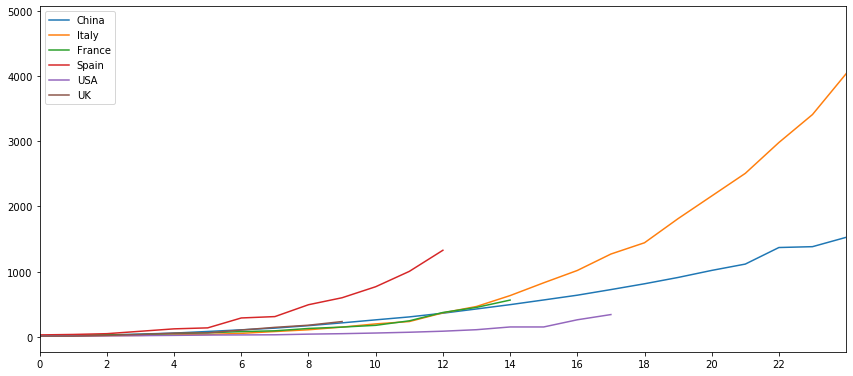

In [23]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#China
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "China"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "China"]["Cumul Deaths"], label="China")

#Italy
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "Italy"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "Italy"]["Cumul Deaths"], label="Italy")

#France
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "France"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "France"]["Cumul Deaths"], label="France")

#Spain
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "Spain"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "Spain"]["Cumul Deaths"], label="Spain")

#United States of America
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "United_States_of_America"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "United_States_of_America"]["Cumul Deaths"], label="USA")

#United Kingdom
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "United_Kingdom"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "United_Kingdom"]["Cumul Deaths"], label="UK")

plt.xticks(np.arange(0, 23, step=2))
plt.xlim((0,24))

#ax.plot(x, x**3, label="x**3")
ax.legend()

# Italy

In [19]:
dataDeaths[dataDeaths["Countries and territories"] == "Italy"]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Cumul Cases,Cumul Deaths,Cases Change,Deaths Change,Days after D10
3034,2020-02-26,26,2,2020,93,5,Italy,IT,322,11,0.406114,0.833333,0
3033,2020-02-27,27,2,2020,78,1,Italy,IT,400,12,0.242236,0.090909,1
3032,2020-02-28,28,2,2020,250,5,Italy,IT,650,17,0.625000,0.416667,2
3031,2020-02-29,29,2,2020,238,4,Italy,IT,888,21,0.366154,0.235294,3
3030,2020-03-01,1,3,2020,240,8,Italy,IT,1128,29,0.270270,0.380952,4
3029,2020-03-02,2,3,2020,561,6,Italy,IT,1689,35,0.497340,0.206897,5
3028,2020-03-03,3,3,2020,146,17,Italy,IT,1835,52,0.086442,0.485714,6
3027,2020-03-04,4,3,2020,667,28,Italy,IT,2502,80,0.363488,0.538462,7
3026,2020-03-05,5,3,2020,587,27,Italy,IT,3089,107,0.234612,0.337500,8
3025,2020-03-06,6,3,2020,769,41,Italy,IT,3858,148,0.248948,0.383178,9


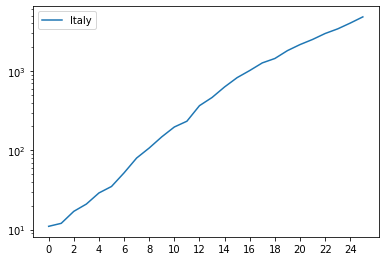

In [25]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Italy
ax.plot(dataDeaths[dataDeaths["Countries and territories"] == "Italy"]["Days after D10"], dataDeaths[dataDeaths["Countries and territories"] == "Italy"]["Cumul Deaths"], label="Italy")
ax.set_yscale("log")


plt.xticks(np.arange(0, 25, step=2))

#ax.plot(x, x**3, label="x**3")
ax.legend()

# Morocco

In [15]:
data[data["Countries and territories"] == "Morocco"]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Cumul Cases,Cumul Deaths,Cases Change,Deaths Change
3875,2020-03-03,3,3,2020,1,0,Morocco,MA,1,0,NaN,NaN
3874,2020-03-06,6,3,2020,1,0,Morocco,MA,2,0,1.000000,NaN
3873,2020-03-12,12,3,2020,3,1,Morocco,MA,5,1,1.500000,inf
3872,2020-03-13,13,3,2020,1,0,Morocco,MA,6,1,0.200000,0.0
3871,2020-03-14,14,3,2020,1,0,Morocco,MA,7,1,0.166667,0.0
3870,2020-03-15,15,3,2020,11,0,Morocco,MA,18,1,1.571429,0.0
3869,2020-03-16,16,3,2020,10,0,Morocco,MA,28,1,0.555556,0.0
3868,2020-03-17,17,3,2020,9,0,Morocco,MA,37,1,0.321429,0.0
3867,2020-03-18,18,3,2020,7,1,Morocco,MA,44,2,0.189189,1.0
3866,2020-03-19,19,3,2020,10,0,Morocco,MA,54,2,0.227273,0.0


/Users/wassim/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


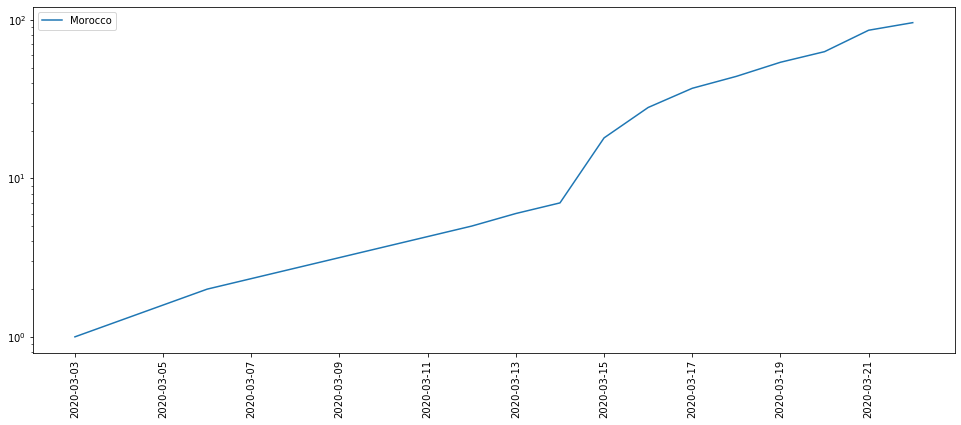

In [16]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#Morocco
ax.plot(data[data["Countries and territories"] == "Morocco"]["DateRep"], data[data["Countries and territories"] == "Morocco"]["Cumul Cases"], label="Morocco")
ax.set_yscale("log")

plt.xticks(rotation='vertical')

#ax.plot(x, x**3, label="x**3")
ax.legend()